
# Project: Investigate a Dataset ( TMDb Movie Data )

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This dataset is about all about information on various movies Collected by TMDb database including thier different attributes like runtime, genre, revenues,budgets, etc..
this dataframe contains 10865 rows which describes how many films in the dataset and 21 columns which describes the attribute of each movie (The dataset contains movies from 1960 to 2015)



**Asking Questions about the Dataset:**


1)What are the best movies of all time? (Highest popularity ratings from 1960 to 2015)

2)What are the worst movies of all time? (lowest popularity ratings from 1960 to 2015)

3)What's the budget trend since 1960 ?

4)What's the revenue trend since 1960 ?




In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


#Importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#To allow visualizations appear in the notebook
% matplotlib inline


<a id='wrangling'></a>
## Data Wrangling

After loading the dataset and after using info and describe functions from pandas library, it turns out that there's unnecessary columns that might be useful in other analysis process but they'll not be useful in my analysis so they need to be trimmed for a better clearance, also there's inaccurate information and NaN (null) values and rows with no actual values(zeros) need to be removed and so is duplicates.
### General Properties

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
tmdb_df=pd.read_csv('tmdb-movies.csv')
tmdb_df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
#get some information about the dataset
tmdb_df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [4]:
#some summary statistics on the data provided
tmdb_df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [5]:
#no. of rows of rows and columns respectively in the dataset
tmdb_df.shape

(10866, 21)

In [6]:
#Checking the no. of duplicated values
tmdb_df.duplicated().sum()

1

In [7]:
#Checking the no. of unique values
tmdb_df.nunique().sum()

119205

In [8]:
#Checking the null values in every column
tmdb_df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64


### Data Cleaning (Removing Unnecessary Data for a clear analysis)

1- since vote_count column is not accurate and not equal for each movie so it will not describe which movies has popularity with audience, so it will be removed and so is vote_average

2- deleting other unnecessary columns for the analysis

(budget_adj, revenue_adj, vote_average, vote_count, production_companies, overview, keywords, tagline, homepage, id, imdb_id)

3- Removing null and zero values from columns

4-removing duplicates


### 1. Removing unnecessary columns

In [9]:
# After discussing the structure of the data and any problems that need to be-
# cleaned,I'll perform those cleaning steps in this section.


#creating a list that contain all unneeded columns
unnecessary_columns=['budget_adj', 'revenue_adj', 'vote_average', 'vote_count', 'production_companies', 'overview', 'keywords', 
                     'tagline', 'homepage', 'id', 'imdb_id']

#dropping the unnecessary columns
# axis=1 means to drop labels from column
#inplace = True => returns None
#sources: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html
tmdb_df.drop(unnecessary_columns, axis=1, inplace=True)

#check whether or not the columns are dropped
tmdb_df.head(1)

,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,release_year
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,2015


### Removing NULL Values

In [10]:
#Reference source: https://stackoverflow.com/questions/39436018/how-to-drop-null-values-in-pandas

tmdb_df.dropna(subset=['popularity', 'budget', 'revenue', 'original_title','cast','director', 
                       'runtime','genres','release_date', 'release_year'], inplace=True)
#check that there's no nulls became existing
tmdb_df.isnull().sum()

popularity        0
budget            0
revenue           0
original_title    0
cast              0
director          0
runtime           0
genres            0
release_date      0
release_year      0
dtype: int64

In [11]:
#shape after dropping unnecessary columns and null value
tmdb_df.shape

(10732, 10)

### Removing Zero Values from the data set:
It turns out when I opened the csv file that 'budget' and 'revenue' columns have zero values so they need to be truncated

In [12]:
#creating a list contains zero values
list_with_zeros=['budget', 'revenue']

#since there's no direct way A.K.A function to remove zeros in pandas so we will convert zero to null and then drop nulls
#Reference source:https://stackoverflow.com/questions/22649693/drop-rows-with-all-zeros-in-pandas-data-frame

tmdb_df[list_with_zeros]=tmdb_df[list_with_zeros].replace(0, np.nan)

tmdb_df.dropna(subset=list_with_zeros, inplace=True)

tmdb_df.shape

(3850, 10)

### Drop Duplicates

In [13]:
tmdb_df.drop_duplicates(keep='first', inplace=True)

# keep='first' => keeps the first ocurrence and drop the other duplicates
#Src: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop_duplicates.html

tmdb_df.shape


(3849, 10)

### Creating a new edited dataset after cleaning messy data and storing it for upcoming uses

In [14]:
tmdb_df.to_csv('tmdb-movies_edited.csv', index=False)

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1 (what are the best movies of all time? (Highest popularity ratings from 1960 to 2015) )

In [15]:
tmdb_df= pd.read_csv('tmdb-movies_edited.csv')

popular_movies=tmdb_df.nlargest(10, 'popularity')
popular_movies

#Reference src: https://www.geeksforgeeks.org/get-n-largest-values-from-a-particular-column-in-pandas-dataframe/

,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,release_year
0,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,2015
1,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,5/13/15,2015
160,24.949134,165000000.0,6.217525e+08,Interstellar,Matthew McConaughey|Jessica Chastain|Anne Hath...,Christopher Nolan,169,Adventure|Drama|Science Fiction,11/5/14,2014
161,14.311205,170000000.0,7.733124e+08,Guardians of the Galaxy,Chris Pratt|Zoe Saldana|Dave Bautista|Vin Dies...,James Gunn,121,Action|Science Fiction|Adventure,7/30/14,2014
2,13.112507,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,3/18/15,2015
162,12.971027,170000000.0,7.147666e+08,Captain America: The Winter Soldier,Chris Evans|Scarlett Johansson|Sebastian Stan|...,Joe Russo|Anthony Russo,136,Action|Adventure|Science Fiction,3/20/14,2014
325,12.037933,11000000.0,7.753980e+08,Star Wars,Mark Hamill|Harrison Ford|Carrie Fisher|Peter ...,George Lucas,121,Adventure|Action|Science Fiction,3/20/77,1977
163,11.422751,20000000.0,7.873990e+07,John Wick,Keanu Reeves|Michael Nyqvist|Alfie Allen|Wille...,Chad Stahelski|David Leitch,101,Action|Thriller,10/22/14,2014
3,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,2015
164,10.739009,125000000.0,7.521002e+08,The Hunger Games: Mockingjay - Part 1,Jennifer Lawrence|Josh Hutcherson|Liam Hemswor...,Francis Lawrence,123,Science Fiction|Adventure|Thriller,11/18/14,2014


### Plotting the most popular movies:

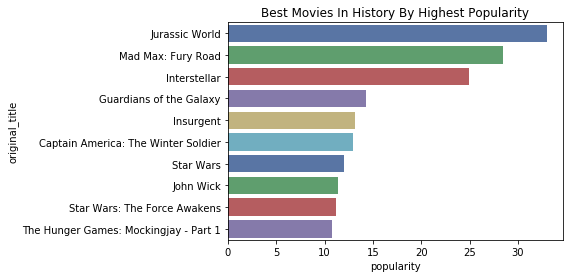

In [16]:
plot = sns.barplot("popularity", y="original_title", data=popular_movies,  palette="deep")
plt.title('Best Movies In History By Highest Popularity');


#using seaborn for more aesthetic plot
#sources:

#https://seaborn.pydata.org/generated/seaborn.barplot.html#seaborn.barplot
#https://seaborn.pydata.org/examples/color_palettes.html

### Research Question 2  (Worst Movies by popularity)

In [17]:
# Continue to explore the data to address additional research
#   questions.  more headers added as needed for more questions to
#   investigate.


#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.nsmallest.html
less_popular_movies=tmdb_df.nsmallest(10, 'popularity')
less_popular_movies

,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,release_year
2553,0.001117,350000.0,3515061.0,Born into Brothels,Zana Briski|Avijit|Geeta Masi|Kochi|Mamuni,Zana Briski|Ross Kauffman,85,Documentary,12/8/04,2004
2033,0.010335,30000000.0,68129518.0,Ð¡Ñ‚Ð°Ð»Ð¸Ð½Ð³Ñ€Ð°Ð´,Thomas Kretschmann|Yanina Studilina|Philippe R...,Fyodor Bondarchuk,131,War|Action,10/9/13,2013
2837,0.015727,15000000.0,16500000.0,Spacehunter: Adventures in the Forbidden Zone,Peter Strauss|Molly Ringwald|Michael Ironside|...,Lamont Johnson,90,Adventure|Science Fiction,5/20/83,1983
3193,0.015997,15000000.0,5217498.0,The In Crowd,Susan Ward|Lori Heuring|Matthew Settle|Nathan ...,Mary Lambert,105,Thriller,7/19/00,2000
3655,0.017498,35000000.0,35323292.0,The Bad News Bears,Walter Matthau|Tatum O'Neal|Christopher Daniel...,Michael Ritchie,102,Comedy|Family,4/7/76,1976
1423,0.017708,40000.0,1434436.0,The Kid Stays in the Picture,Robert Evans|Eddie Albert|Francis Ford Coppola...,Nanette Burstein|Brett Morgen,93,Documentary,1/18/02,2002
2918,0.018196,6000000.0,5093707.0,Top Dog,Chuck Norris|Michele Lamar Richards|Carmine Ca...,Aaron Norris,86,Action|Adventure|Comedy|Family|Thriller,4/28/95,1995
2748,0.019101,2000000.0,1431623.0,No End in Sight,Campbell Scott|Gerald Burke|Ali Fadhil|Robert ...,Charles Ferguson,102,Documentary,7/27/07,2007
1098,0.021371,3500000.0,7700000.0,Expelled: No Intelligence Allowed,Ben Stein|Richard Dawkins|William Dembski|Paul...,Nathan Frankowski,90,Documentary,4/18/08,2008
693,0.028227,10000000.0,5000000.0,Action Replayy,Akshay Kumar|Aishwarya Rai Bachchan|Neha Dhupi...,Vipul Amrutlal Shah,100,Drama|Comedy|Romance|Foreign,11/5/10,2010


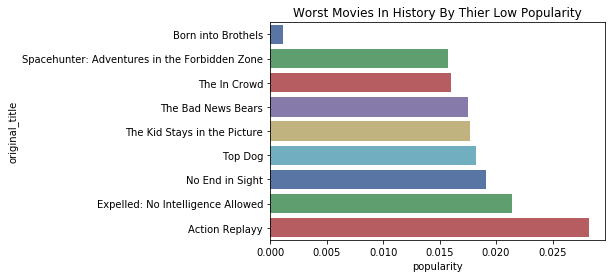

In [18]:
less_popular_movies.drop([2033], inplace=True) #Removed the 2nd row because it has an inappropriate name

plot = sns.barplot("popularity", y="original_title", data=less_popular_movies,  palette="deep")
plt.title('Worst Movies In History By Thier Low Popularity');


### Research Question 3 (Finding the budget trend since 1966 ?)

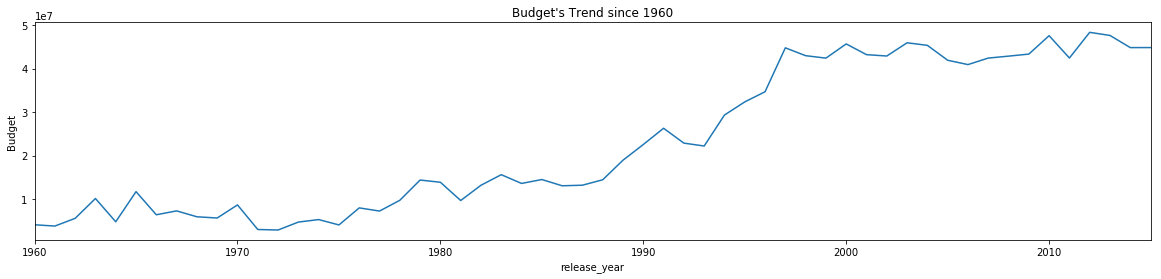

In [21]:
#aggregating variables by a year to count the mean of movies in every year
years_aggr= tmdb_df.groupby('release_year').mean()

#finding budget's trend
years_aggr['budget'].plot(figsize=(20,4));
plt.ylabel('Budget');
plt.title("Budget's Trend since 1960");

### Research Question 4 (Finding the revenue trend since 1960 ?)

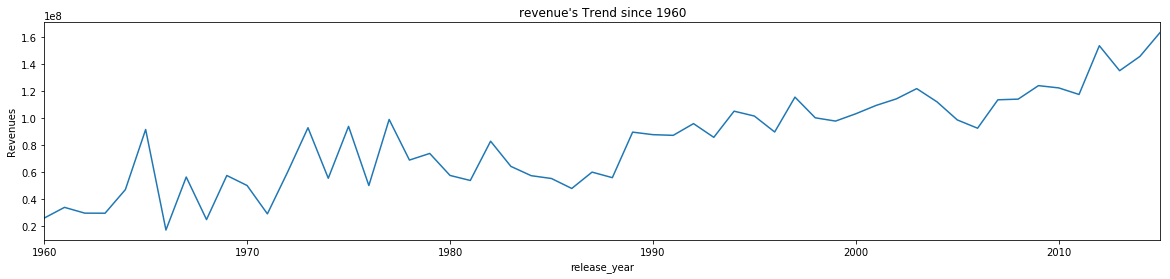

In [32]:
#finding budget's trend
years_aggr['revenue'].plot(figsize=(20,4));
plt.ylabel('Revenues');
plt.title("revenue's Trend since 1960");

# Conclusions <a id='conclusions'></a>

#### Some Limitations

1) For the first research question

the best movies by popularity were plotted and there was a limitation since we truncated null and zero value before perfomring EDA so the results could be different if there was no missing values from the beginning

2) For the 2nd research question

the same limitaion related with first research question affected the output and adding to this, the column original_title row 2033 has a strange name with inappropriate symbols so i decided to drop that row from the dataset, so the affected the on the resulting plot for lowest popular movies

3) For 3rd research question 

the trend direction is to the right and the budget rate is increasing over time and that maybe a correlation for increasing of increasing the price of filmmaking equipment and salaries of actors but we have to take into consideration that correlation is not a causation so we should have more statistical examples to prove the theory

4)for 4th research question

in the 1960's to nearly 1965 the revenues line appears to moderately stable after that theline kept fluctuating and this maybe a cause of civil wars or economical depression this need to be investigated in more details after making alot of statistical studies.
the line keeps fluctuating and returing to a stable state and then in nearly 2008 it fluctating again and then raised again making the highest revenues in history in the period from 2010 to 2015





In [41]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0